In [3]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from matplotlib.cm import rainbow

In [4]:
# Importing the dataset

from google.colab import drive
drive.mount('/content/drive/')
#     #      #      #       #      #
data = pd.read_csv('/content/drive/MyDrive/ML project/data.csv')
# data = pd.read_csv('data.csv')
data

Mounted at /content/drive/


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Data Preprocessing

In [5]:
# Drop features

data.drop(['id'], axis=1, inplace=True)
data.drop(['Unnamed: 32'], axis=1, inplace=True)

In [6]:
# Detect NAN values

data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

B    357
M    212
Name: diagnosis, dtype: int64


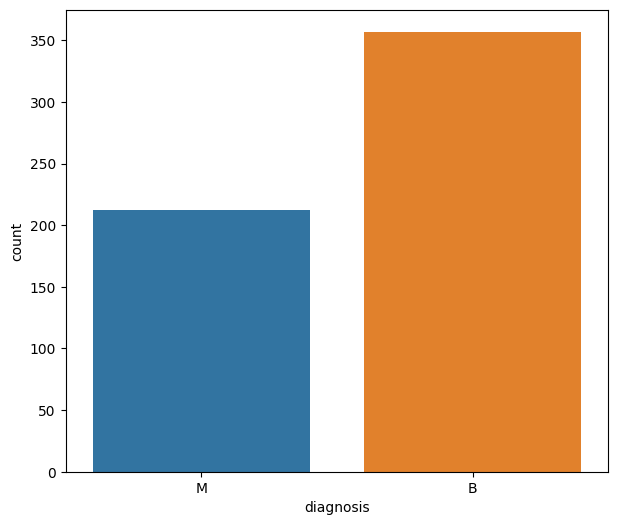

In [7]:
#Distribution of tumor diagnoses (Benign and Malignant)

import seaborn as sns
print(data['diagnosis'].value_counts())
plt.figure(figsize=(7, 6))
sns.countplot(
    x='diagnosis',
    data=data
);

 Observation: M= Malignant (indicates prescence of cancer cells); B= Benign (indicates abscence)

 357 observations indicating the absence of cancer cells, 212 observations shows the presence of cancerous cell.

In [8]:
# Transform the target variable to binary values (1 for 'M', 0 for 'B')

data["diagnosis"]= data["diagnosis"].map(lambda row: 1 if row=='M' else 0)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


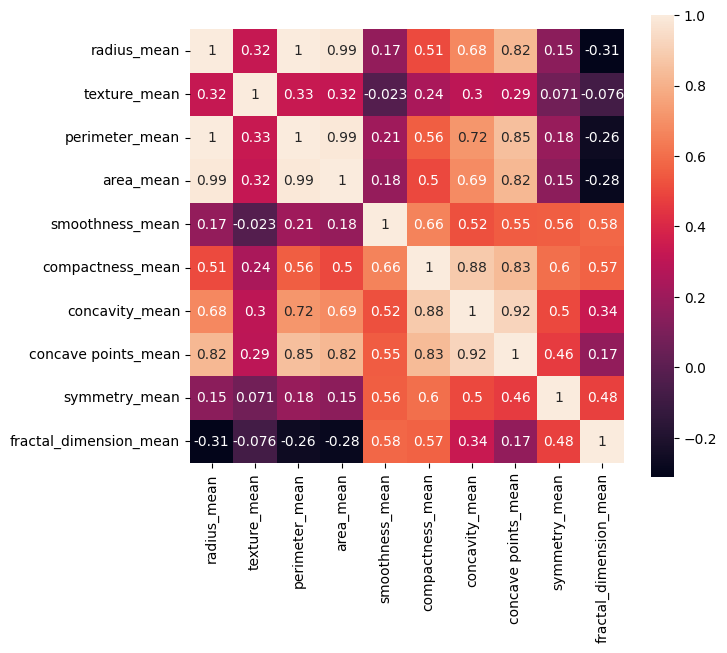

In [9]:
# Relationships between features and diagnoses

features_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plt.figure(figsize=(7,6))
heat = sns.heatmap(data[features_mean].corr(), vmax=1, square=True, annot=True)

The heatmap visually represents the correlations between pairs of the selected features. Positive correlations are indicated by warmer colors closer to 1, while negative correlations are indicated by cooler colors closer to -1. Features that are not strongly correlated will have values closer to 0.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
#Split the dataset into features (X) and target (y)

X = data.drop(['diagnosis'],axis=1)  # remove 'User ID' feature
y = data['diagnosis']

In [12]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
y_train

149    0
124    0
421    0
195    0
545    0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 398, dtype: int64

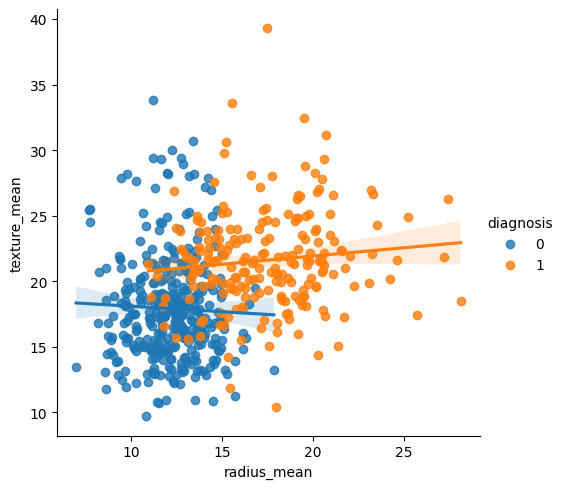

In [13]:
# Visualize the relationship between 'radius_mean' and 'texture_mean' features

sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = data)

Text(0, 0.5, 'cumulative explained variance')

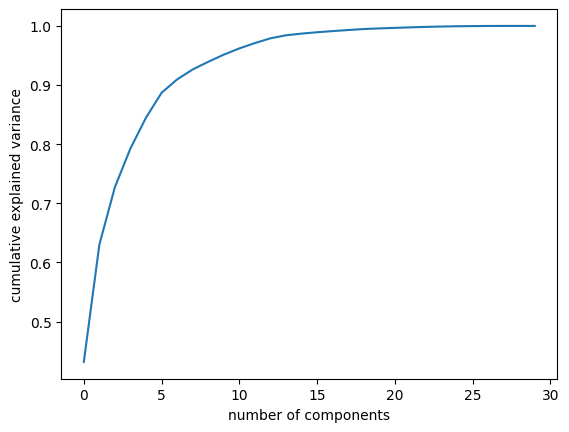

In [14]:
# Feature Scaling
# Standardize the features and perform PCA for dimensionality reduction

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
pca=PCA().fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [15]:
pca=PCA(n_components=10)
pca.fit(X_train_std)
X_train_pca=pca.transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
print(X_train_pca.shape)
print(X_test_pca.shape)

(398, 10)
(171, 10)


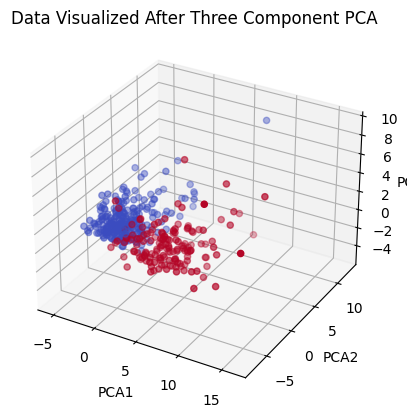

In [16]:
# Visualize PCA in a 3D plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='coolwarm')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('Data Visualized After Three Component PCA')
plt.show()


### Model 1: KNN

In [17]:
# Performing 11 fold Cross Validation to tue hyperparameter

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
nbrs = []
cv_scores = []
for k in range(1,40):
    nbrs.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X_train_pca,y_train,cv=11, scoring = 'accuracy')
    cv_scores.append(scores.mean())


In [18]:
# Misclassification error
MSE = [1-x for x in cv_scores]

#Optimal value of k, with least MSE

optimal_k = nbrs[MSE.index(min(MSE))]

print('The optimal value of K (neighbors) is %d ' %optimal_k)


The optimal value of K (neighbors) is 9 


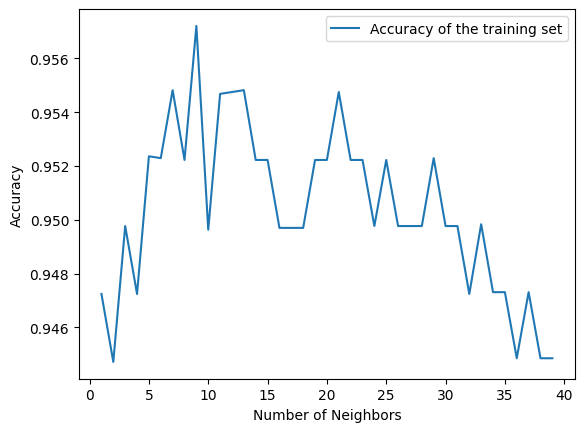

In [19]:
# Plotting the relationship between the number of neighbors (k) and model accuracy.

plt.plot(nbrs,cv_scores, label='Accuracy of the training set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

Observation: K=9 give us best accuracy

In [20]:
# Creating KNN Model

knn = KNeighborsClassifier(n_neighbors = 9)

knn.fit(X_train_pca,y_train)

y_pred_knn = knn.predict(X_test_pca)

In [21]:
y_test.shape

(171,)

In [22]:
y_pred_knn.shape


(171,)

In [23]:
# Evaluating model

from sklearn.metrics import accuracy_score
accuracy_knn=accuracy_score(y_test,y_pred_knn)*100
print("K Neighrest neibor Accuracy: {:.2f}%".format(accuracy_knn))

K Neighrest neibor Accuracy: 97.08%


### Model 2: SVM

In [24]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", gamma='auto', probability= True, random_state=0)

In [25]:
# we perform hyperparameter tuning for SVC.
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.001,0.1,1,10], 'degree':[1,3,10]}
svc_cv=GridSearchCV(svm,param_grid=param_grid,cv = 3, n_jobs = -1, verbose = 0)
svc_cv.fit(X_train_pca, y_train)
svc_cv.best_params_

{'C': 1, 'degree': 1}

Observation: C=1 andd degree=1 give best performance

In [26]:
svm = SVC(C=1, probability=True)

In [27]:
svm.fit(X_train_pca, y_train)

SVC(C=1, probability=True)

In [28]:
# Evaluting SVM model
y_pred_svm = svm.predict(X_test_pca)
accuracy_svc=accuracy_score(y_test,y_pred_svm)*100
print("Super Vector Machine Accuracy: {:.2f}%".format(accuracy_svc))

Super Vector Machine Accuracy: 97.66%


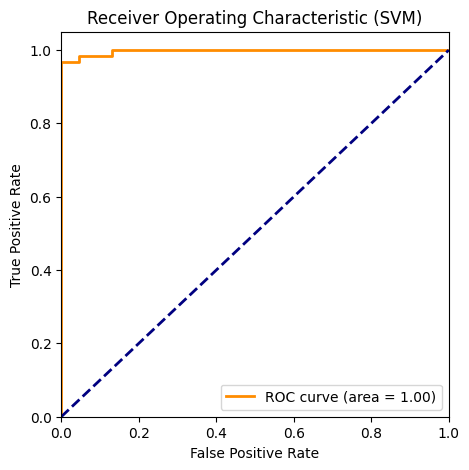

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob_svm = svm.predict_proba(X_test_pca)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc = roc_auc_score(y_test, y_pred_prob_svm)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc='lower right')
plt.show()

this plot calculates the ROC curve and the AUC (Area Under the Curve) to assess the performance of the SVM (Support Vector Machine) model for binary classification. The ROC curve illustrates the trade-off between true positive rate and false positive rate at different classification thresholds, and the AUC quantifies the overall performance of the model. The plot displays the ROC curve and AUC value for the SVM model.

### Model 3:Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create a Random Forest model
rf = RandomForestClassifier(n_estimators=50, random_state=0)

# Aplly cross-validation for RF
# Use accuracy as the scoring metric for cross-validation
num_folds = 5
scores = cross_val_score(rf, X_train_pca, y_train, cv=num_folds, scoring='accuracy')

# Calculate the mean accuracy score
mean_accuracy = scores.mean()

print("Mean Accuracy: {:.2f}%".format(mean_accuracy*100))

# Train the model using the accuracy metric
rf = RandomForestClassifier(n_estimators=50, random_state=0)
rf.fit(X_train_pca, y_train)
# Evaluate the Random Forest model
y_pred_rf = rf.predict(X_test_pca)
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
print("Random Forest Accuracy: {:.2f}%".format(accuracy_rf))

Mean Accuracy: 93.96%
Random Forest Accuracy: 97.08%


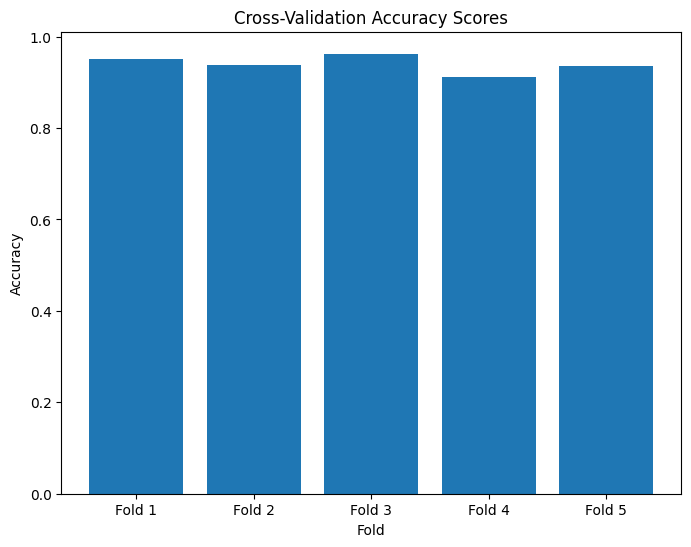

In [31]:
# Create a bar plot to visualize the accuracy scores for each fold
plt.figure(figsize=(8, 6))
plt.bar(range(1, num_folds + 1), scores, tick_label=[f"Fold {i}" for i in range(1, num_folds + 1)])
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

Each bar represents the accuracy score for one fold, making it easier to see the variation between folds. The x-axis shows the fold number, and the y-axis represents the accuracy scores.We observed that  there are small differences in accuracy between the folds in our cross-validation results, with one fold having slightly higher accuracy than the others, it generally means that your model is performing consistently across the different subsets of data.

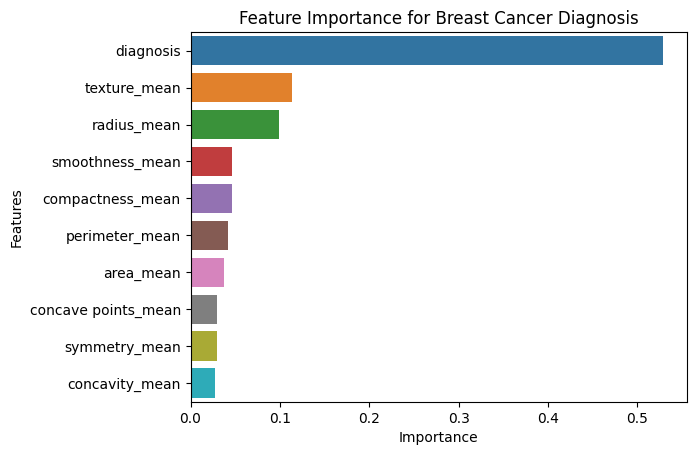

In [32]:
# Create dataframe by zipping RFC feature importances and column names
rfc_features = pd.DataFrame(zip(rf.feature_importances_, data.columns[:-1]), columns = ['Importance', 'Features'])

# Sort in descending order for easy organization and visualization
rfc_features = rfc_features.sort_values(['Importance'], ascending=False)

# Visualize RFC feature importances
sns.barplot(x = 'Importance', y = 'Features', data = rfc_features, )
plt.title('Feature Importance for Breast Cancer Diagnosis')
sns.set_style("whitegrid")
plt.show()

The bar chart displays the top features with the highest importance scores as determined by the Random Forest model. These features have the most influence on the model's predictions.

## Ensembling classifiers

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a new feature matrix using the predictions of the three models
X_stack = np.column_stack((y_pred_knn, y_pred_svm,y_pred_rf))


In [47]:
print("KNN prediction", y_pred_knn)
print("SVM prediction", y_pred_svm)

KNN prediction [0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
SVM prediction [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]


In [34]:
y_pred_knn.shape

(171,)

In [48]:
X_stack

array([[0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0,

In [35]:
X_stack.shape

(171, 3)

In [36]:
# Create a Gradient Boosting ensemble
ensemble = GradientBoostingClassifier(
    n_estimators=50,  # You can adjust the number of boosting rounds
    random_state=0
)

# Fit the Gradient Boosting ensemble to the stacked features
ensemble.fit(X_stack, y_test)

# Now, you can make predictions on the test set using the stacked features
X_test_stack = np.column_stack((knn.predict(X_test_pca), svm.predict(X_test_pca), rf.predict(X_test_pca)))


In [37]:
X_test_stack.shape

(171, 3)

In [38]:
y_pred_ensemble = ensemble.predict(X_test_stack)

In [49]:
y_pred_ensemble.shape

(171,)

In [39]:
# Evaluating Ensembling Classifier
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble) * 100
print("Stacked Gradient Boosting Ensemble Accuracy: {:.2f}%".format(accuracy_ensemble))

Stacked Gradient Boosting Ensemble Accuracy: 98.25%


In [40]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
69     0
542    0
176    0
501    1
247    0
Name: diagnosis, Length: 171, dtype: int64

In [41]:
y_pred_ensemble

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [42]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
69     0
542    0
176    0
501    1
247    0
Name: diagnosis, Length: 171, dtype: int64

In [43]:
print("\n--- Model Comparison ---")
print("K Nearest Neighbor Accuracy: {:.2f}%".format(accuracy_knn))
print("Support Vector Machine Accuracy: {:.2f}%".format(accuracy_svc))
print("Random Forest Accuracy: {:.2f}%".format(accuracy_rf))
print("Stacked Gradient Boosting Ensemble Accuracy: {:.2f}%".format(accuracy_ensemble))


--- Model Comparison ---
K Nearest Neighbor Accuracy: 97.08%
Support Vector Machine Accuracy: 97.66%
Random Forest Accuracy: 97.08%
Stacked Gradient Boosting Ensemble Accuracy: 98.25%


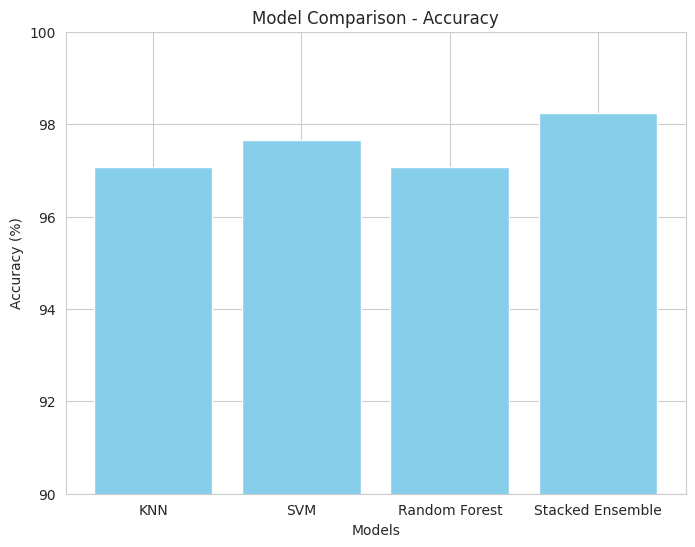

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

# Create a list of model names and their corresponding accuracies
model_names = ["KNN", "SVM", "Random Forest", "Stacked Ensemble"]
accuracies = [accuracy_knn, accuracy_svc, accuracy_rf, accuracy_ensemble]

# Bar chart for model accuracy
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison - Accuracy")
plt.ylim(90, 100)
plt.show()


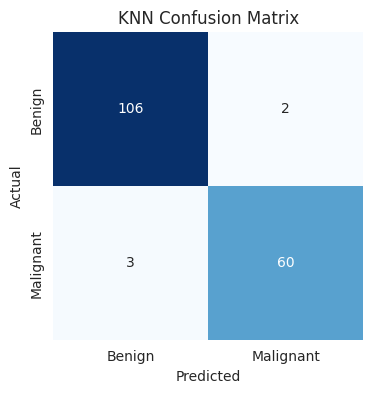

KNN Accuracy: 97.08%
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171




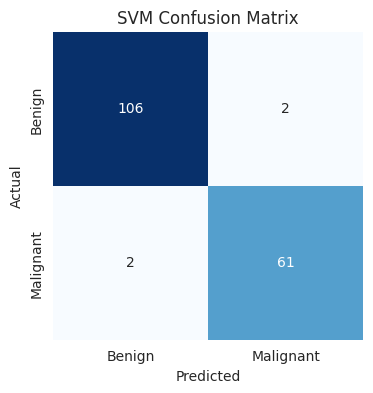

SVM Accuracy: 97.66%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171




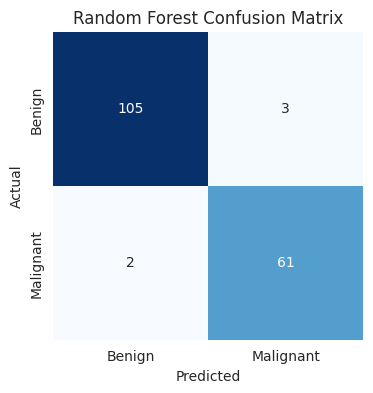

Random Forest Accuracy: 97.08%
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171




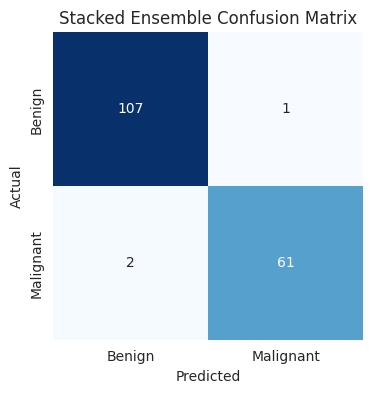

Stacking Ensemble Accuracy: 98.25%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [45]:
# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xticks(np.arange(len(classes)) + 0.5, classes)
    plt.yticks(np.arange(len(classes)) + 0.5, classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_knn, classes=['Benign', 'Malignant'], title='KNN Confusion Matrix')
print("KNN Accuracy: {:.2f}%".format(accuracy_knn))
print(classification_report(y_test, y_pred_knn))
print()

plot_confusion_matrix(y_test, y_pred_svm, classes=['Benign', 'Malignant'], title='SVM Confusion Matrix')
print("SVM Accuracy: {:.2f}%".format(accuracy_svc))
print(classification_report(y_test, y_pred_svm))
print()

plot_confusion_matrix(y_test, y_pred_rf, classes=['Benign', 'Malignant'], title='Random Forest Confusion Matrix')
print("Random Forest Accuracy: {:.2f}%".format(accuracy_rf))
print(classification_report(y_test, y_pred_rf))
print()

plot_confusion_matrix(y_test, y_pred_ensemble, classes=['Benign', 'Malignant'], title='Stacked Ensemble Confusion Matrix')
print("Stacking Ensemble Accuracy: {:.2f}%".format(accuracy_ensemble))
print(classification_report(y_test, y_pred_ensemble))

we've explored different machine learning models and ensembling techniques for breast cancer diagnosis.
Among the individual models, Support Vector Machine achieved the highest accuracy, followed closely by K Nearest Neighbor and Random Forest.
The stacked ensemble methods further improved the accuracy, with Stacked Gradient Boosting achieving the highest accuracy of all.
This demonstrates the effectiveness of combining multiple models to make more accurate predictions in complex tasks like cancer diagnosis.